# LAB - CUDA VISION WS 21/22


Done by - 
- Aysha Athar Siddiqui (3435155)
- Sugan Kanagasenthinathan (3315859)
- Vardeep Singh Sandhu (3344662)

## Table of Contents
-  [1. Import Modules](#import)
-  [2. Datasets](#datasets)
    -  [General structure of dataset folder in the code](#general)
    -  [Moving-MNIST Dataset](#mmnistdata)
    -  [KTH Action dataset](#kthdata)
-  [3. Dataloaders](#dataloaders)
    - [Moving-MNIST dataloader](#mmnistloader)
    -  [KTH Action dataloader](#kthloader)
-  [4. Experiments and Results](#model)
    -  [Moving-MNIST imports and some visualizations](#mmnistmodel)
    -  [KTH Action imports and some visualizations](#kthmodel)
- [5. Best Performing models](#best)
    -  [Moving-MNIST - trained with combined perceptual loss and onplateauLR schedular](#bestmmnist)
    -  [KTH Action - trained with combined perceptual loss and onplateauLR schedular](#bestkth)
- [6. Statistics](#best)
-  [References]

<h3 id=import> Importing Modules </h3>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from model import Model
import utils
import wandb
import argparse
from attrdict import AttrDict
import matplotlib.pyplot as plt
import os

In [ ]:
print("Module versions:")
print('\n'.join(f'{"> " + m.__name__}: {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))
plt.style.use('seaborn')

Module versions:
> torch: 1.10.0
> wandb: 0.12.11
> argparse: 1.1


<h3 id="datasets">Datasets</h3>

<p id="general">The general structure of our data folder is described below. the sequences.txt has been modified and put up on Github in the folder datasets. It contained a video file that was corrupted, namely  person01_boxing_d4_uncomp.avi. We remove this from the original sequences.txt for simplicity. Everything else remains the same.<br>
    Initially, for the first time, change download flag to True in the <em>load_dataset()</em> function in utils.py for the KTH dataset. Once the .pt files have been generated, for the next time, change the download flag to False.<br></p>

<span style='font-family:courier'><p1><left>
&emsp;|── Cuda Lab Project <br>
   &emsp;&emsp; |── scripts ,..... <br>
   &emsp;&emsp; |── data <br>
           &emsp;&emsp;&emsp; |── KTH <br>
            &emsp;&emsp;&emsp;   &emsp;|── boxing <br>
            &emsp;&emsp;&emsp;    &emsp;|── handclapping<br>
            &emsp;&emsp;&emsp;   &emsp;|── handwaving<br>
            &emsp;&emsp;&emsp;    &emsp;|── jogging<br>
            &emsp;&emsp;&emsp;   &emsp;|── running<br>
            &emsp;&emsp;&emsp;   &emsp;|── walking<br>
            &emsp;&emsp;&emsp;   &emsp;|── sequences.txt<br>
            &emsp;&emsp;&emsp;   &emsp;|── data <br>
            &emsp;&emsp;&emsp;   &emsp;&emsp;|──All .pt files, processed video files<br>
            &emsp;&emsp;&emsp;|──MNIST<br>
                &emsp;&emsp;&emsp;&emsp;|── raw <br>
                &emsp;&emsp;&emsp;&emsp;|── processed<br>
                &emsp;&emsp;&emsp;&emsp;&emsp;|── moving_test.pt<br>
                &emsp;&emsp;&emsp;&emsp;&emsp;|── moving_train.pt
    </left>
    </p1>
    </span>

 
   

Path to the dataset folder which contains two seperate folders for MovingMNIST and KTH datasets

In [ ]:
dataset_path="data"

To download KTH action dataset, download the dataset from the website https://www.csc.kth.se/cvap/actions/ or run the script download_kth.sh inside the data folder.

In [ ]:
mnist_path = os.path.join(dataset_path, "MNIST")
kth_path = os.path.join(dataset_path, "KTH")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<h5 id="mmnistdata">Loading and visualising a part of the training data for Moving-MNIST dataset.</h5>

---> Total  length of training set for Moving-MNIST dataset 60000
---> Total length of testing set for Moving-MNIST dataset 10000


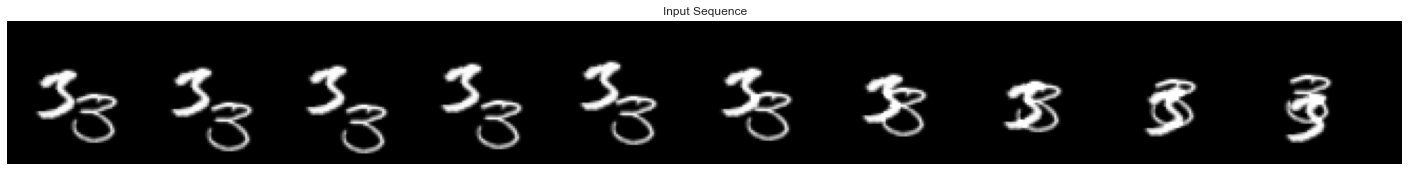

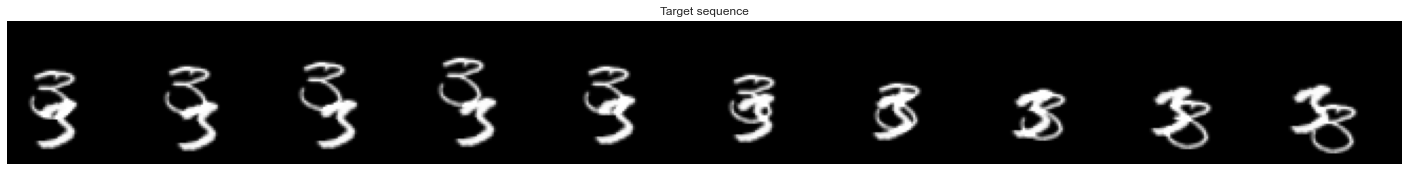

In [ ]:
train_set_mnist, test_set_mnist = utils.load_information(mnist_path,dataset='smmnist')
print("---> Total  length of training set for Moving-MNIST dataset", len(train_set_mnist))
print("---> Total length of testing set for Moving-MNIST dataset", len(test_set_mnist))
utils.visualise_sample(train_set_mnist,False,device,False)

<h5 id="kthdata">Loading and visualising a part of the training data for KTH action dataset.</h5>

---> Total  length of training set for KTH dataset 23619
---> Total length of testing set for KTH dataset 12599


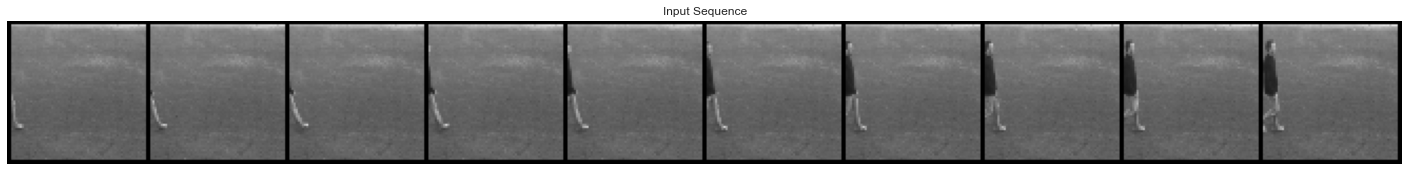

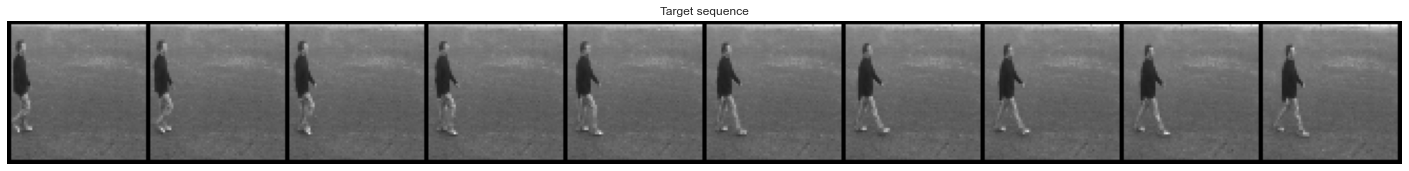

In [ ]:
train_set_kth, test_set_kth = utils.load_information(kth_path,dataset='kth')
print("---> Total  length of training set for KTH dataset", len(train_set_kth))
print("---> Total length of testing set for KTH dataset", len(test_set_kth))
utils.visualise_sample(train_set_kth,False,device,False)

<h3 id="dataloaders"> Dataloaders </h3>

<h5 id="mmnistloader">Creating dataloaders for Moving-MNIST dataset with a batch size of 32.</h5>

In [ ]:
train_loader_mmnist = DataLoader(
                dataset=train_set_mnist,
                batch_size=32,
                shuffle=True)
print("---> Length of train dataloader",len(train_loader_mmnist))

test_loader_mmnist = DataLoader(
                dataset=test_set_mnist,
                batch_size=32,
                shuffle=True)

print("---> Length of test dataloader",len(test_loader_mmnist))
print("Data loader for Moving-MNIST dataset ready !")

---> Length of train dataloader 1875
---> Length of test dataloader 313
Data loader for Moving-MNIST dataset ready !


<h5 id="kthloader">Creating dataloaders for KTH action dataset with a batch size of 32.</h5>

In [ ]:
train_loader_kth = DataLoader(
                dataset=train_set_kth,
                batch_size=32,
                shuffle=True)
print("---> Length of train dataloader",len(train_loader_kth))

test_loader_kth = DataLoader(
                dataset=test_set_kth,
                batch_size=32,
                shuffle=True)

print("---> Length of test dataloader",len(test_loader_kth))
print("Data loader for KTH action dataset ready !")

---> Length of train dataloader 739
---> Length of test dataloader 394
Data loader for KTH action dataset ready !


<h3 id="model">Importing the models.</h3>

<h5 id="mmnistmodel">Moving-MNIST experiment models. </h5>

The various experiments performed with the Moving Mnist Dataset and their corresponding weights and biases links are provided below:

1. Moving Mnist trained with MSE loss and ReduceLRonPlateau scheduler : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/r7f255pp)

2. Moving Mnist trained with MSE + SSIM loss,  ReduceLRonPlateau scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/20epf5oc)

3. Moving Mnist trained with MSE + SSIM loss,  Exponential LR scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/nj3r6no2)

4. Moving Mnist trained with MAE + SSIM loss, Exponential LR scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/1w8zq9iw)

5. Moving Mnist trained with MSE and ReduceLRonPlateau scheduler
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/1hlpf9ib)

6. Moving Mnist trained with MAE and ReduceLRonPlateau scheduler
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2ndv287l)

7. Moving Mnist trained with MSE + SSIM loss,  ReduceLRonPlateau scheduler and LR warmup (Trained without context frame addition)
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2bytrgo0)

8. Moving Mnist trained with MSE + SSIM loss,  ReduceLRonPlateau scheduler and LR warmup (With skipp connections in encoder/decoder - vgg blocks)
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/14tq9vte)

9.  Moving Mnist trained with MAE +SSIM and ReduceLRonPlateau scheduler with LR warmup: [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2m6b32a8)


In [ ]:
sample=next(iter(test_loader_mmnist))

Below is the model trained on MSE loss and Onplateau Schedular without using Learning rate warmup : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/r7f255pp)

In [ ]:
model = Model()
print("Model Loaded")

mnist_mse_plateau, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Documents\\Models-MSE\\mnist_mse+plateau.pth")
mnist_mse_plateau= mnist_mse_plateau.to(device)

Model Loaded


Visualising results on the test dataset. The first line depicts the target sequence and the second depicts the frames our model predicted.

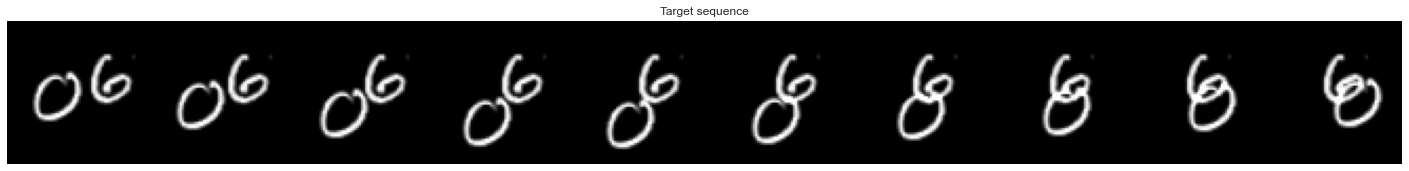

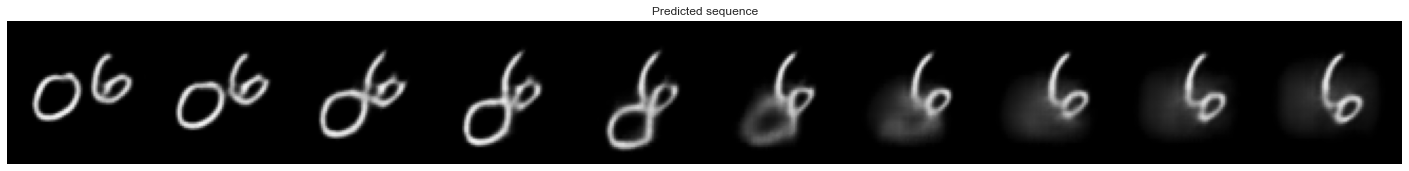

In [ ]:
utils.visualise_sample(sample, mnist_mse_plateau, device, True)


Moving Mnist trained with MSE + SSIM loss,  ReduceLRonPlateau scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/20epf5oc)

In [ ]:
model = Model()
print("Model Loaded")

mnist_mse_ssim_plateau_warmup, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Documents\\Models-MSE\\mnist_mse+ssim+plateau+warmup.pth")
mnist_mse_ssim_plateau_warmup= mnist_mse_ssim_plateau_warmup.to(device)

Model Loaded


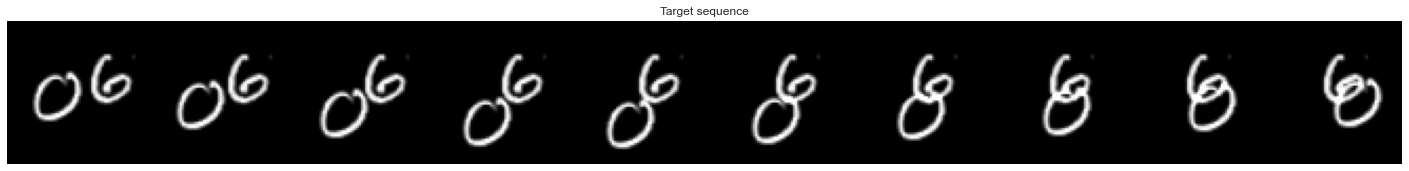

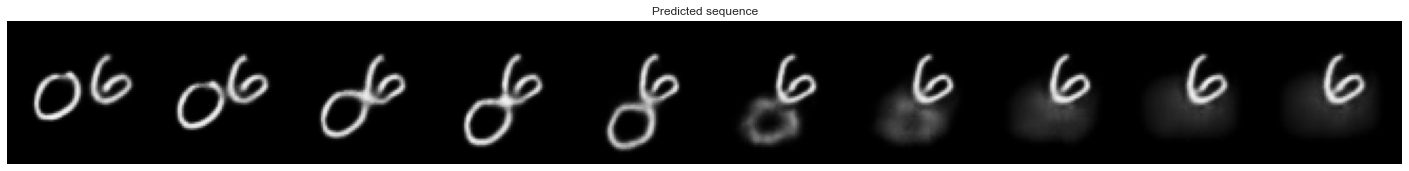

In [ ]:
utils.visualise_sample(sample, mnist_mse_ssim_plateau_warmup, device, True)


Moving Mnist trained with MSE + SSIM loss,  Exponential LR scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/nj3r6no2)

In [ ]:
model = Model()
print("Model Loaded")

mnist_mse_ssim_explr_warmup, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Documents\\Models-MSE\\mnist_mse+ssim+explr+warmup.pth")
mnist_mse_ssim_explr_warmup= mnist_mse_ssim_explr_warmup.to(device)

Model Loaded


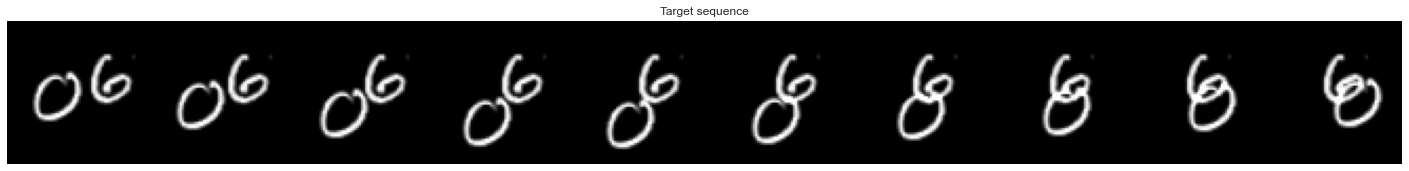

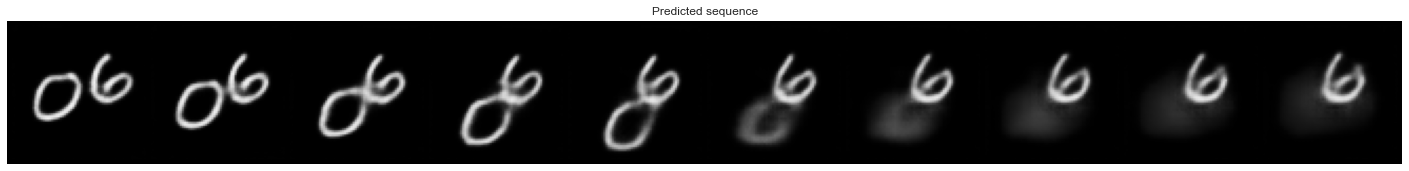

In [ ]:
utils.visualise_sample(sample, mnist_mse_ssim_explr_warmup, device, True)



 Moving Mnist trained with MAE and ReduceLRonPlateau scheduler
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2ndv287l)

In [ ]:
model = Model()
print("Model Loaded")

mnist_mae_plateau, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Documents\\Models-MSE\\mnist_mae+plateau.pth")
mnist_mae_plateau= mnist_mae_plateau.to(device)

Model Loaded


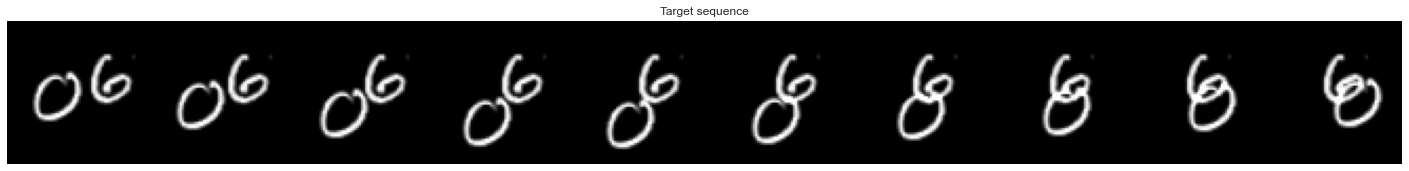

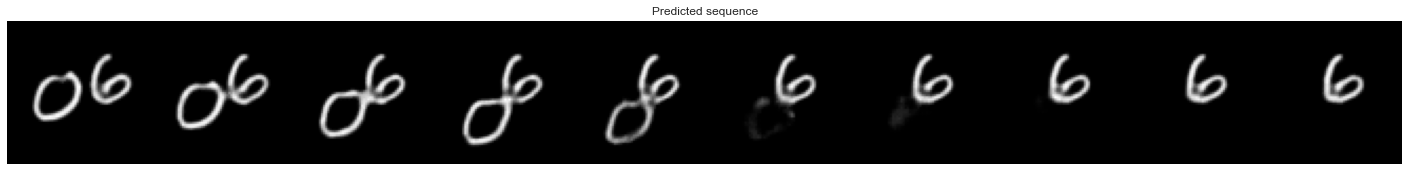

In [ ]:
utils.visualise_sample(sample, mnist_mae_plateau, device, True)


 Moving Mnist trained with MAE + SSIM loss, Exponential LR scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/1w8zq9iw)

In [ ]:
model = Model()
print("Model Loaded")

mnist_mae_ssim_explr_warmup, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Documents\\Models-MSE\\mnist_mae+ssim+explr+warmup.pth")
mnist_mae_ssim_explr_warmup= mnist_mae_ssim_explr_warmup.to(device)

Model Loaded


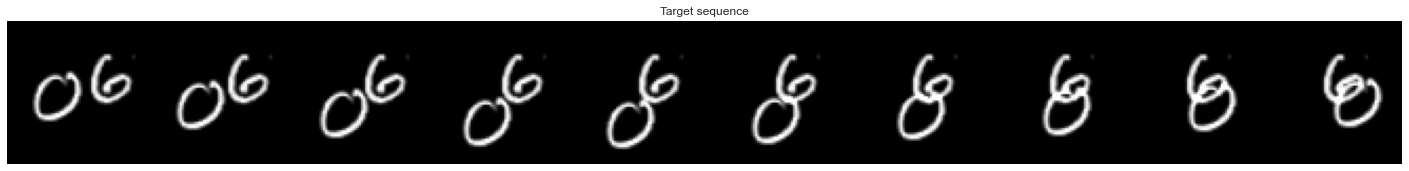

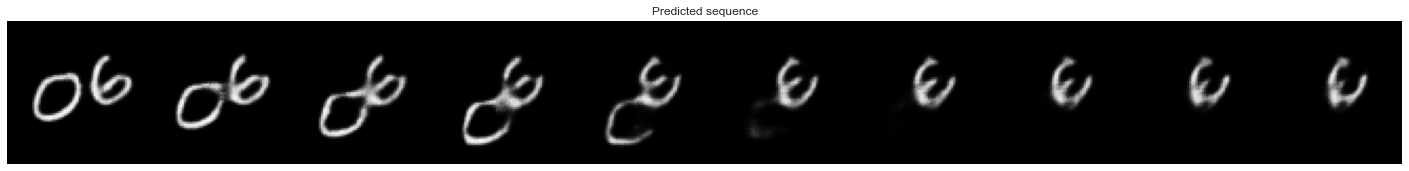

In [ ]:
utils.visualise_sample(sample, mnist_mae_ssim_explr_warmup, device, True)


Moving Mnist trained with MAE +SSIM and ReduceLRonPlateau scheduler with LR warmup: [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2m6b32a8)

In [ ]:
model = Model()
print("Model Loaded")

mnist_mae_ssim_plateau_warmup, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Documents\\Models-MSE\\mnist_mae+ssim+plateau+warmup.pth")
mnist_mae_ssim_plateau_warmup= mnist_mae_ssim_plateau_warmup.to(device)

Model Loaded


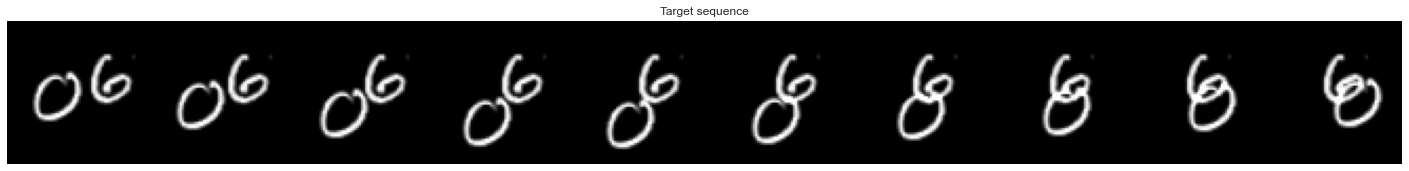

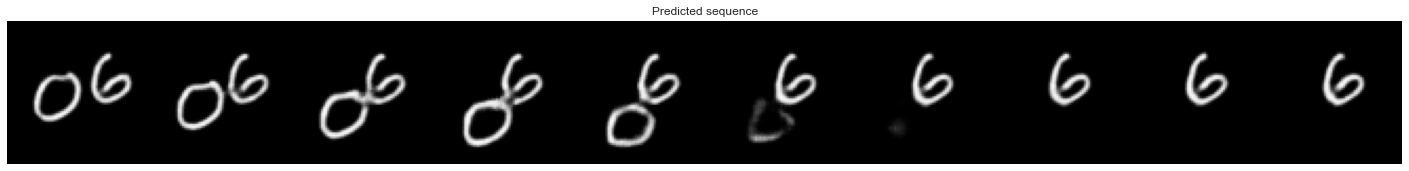

In [ ]:
utils.visualise_sample(sample, mnist_mae_ssim_plateau_warmup, device, True)

<h5 id="kthmodel"> KTH Action Experiment models</h5>

The various experiments performed with the KTH Action Dataset and their corresponding weights and biases links are provided below:

1. KTH Action Dataset trained with MSE loss and ReduceLRonPlateau scheduler : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/m7ukjoe1)

2. KTH Action Dataset trained with MSE + SSIM loss,  ReduceLRonPlateau scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/33x9jgmn)

3. KTH Action Dataset trained with MSE + SSIM loss,  Exponential LR scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2gmbwrcm)

4. KTH Action Dataset trained with MAE + SSIM loss, Exponential LR scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2svofglk)

5. KTH Action Dataset trained with MSE and ReduceLRonPlateau scheduler
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/kjtqxjzo)

6. KTH Action Dataset trained with MAE and ReduceLRonPlateau scheduler
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/2f28fnp9)

7. KTH Action Dataset trained with MAE+SSIM , ReduceLRonPlateau scheduler and LR warmup
 : [Wandb Link](https://wandb.ai/team_india/Video_frame_prediction-scripts/runs/3mr41oqr)



Below is a model trained on the KTH Action dataset using MSE as a loss criterion along with OnPlateau Schedular without learning rate warmup.

In [ ]:
model = Model()
print("Model Loaded")

model_mse_onplateau_kth, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Downloads\\model_50_KTH+mse+without ssim+without lrwarmup+plateau.pth")
model_mse_onplateau_kth= model_mse_onplateau_kth.to(device)

Model Loaded


Visualising results on the test dataset. The first line depicts the target sequence and the second depicts the frames our model predicted.

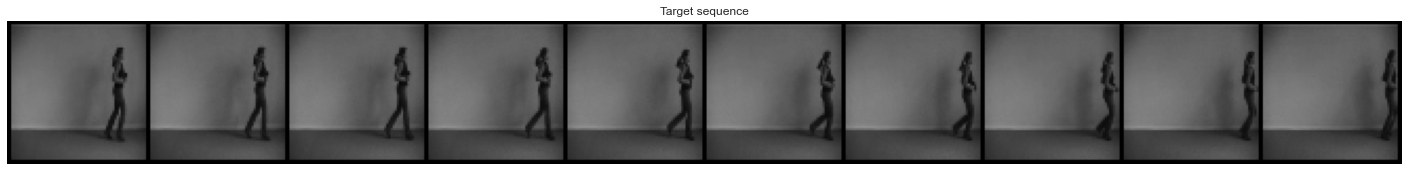

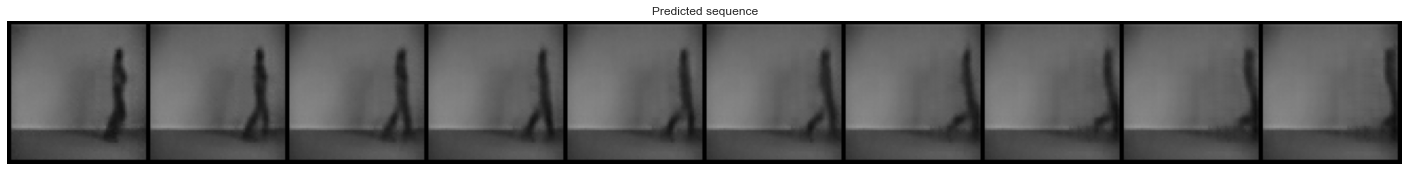

In [ ]:
utils.visualise_sample(test_loader_kth, model_mse_onplateau_kth, device, True)

Another experiment involved using MSE and SSIM as loss citerion with ExponentialLR schedular and learning rate warmup. Below are the target and predicted frames by it.

In [ ]:
model = Model()
print("Model Loaded")

model_mse_ssim_explr_kth, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Downloads\\model_50_KTH+mse+without ssim+without lrwarmup+plateau.pth")
model_mse_ssim_explr_kth= model_mse_ssim_explr_kth.to(device)

Model Loaded


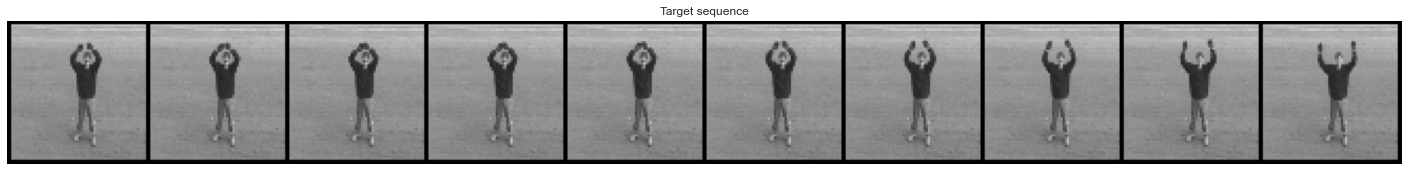

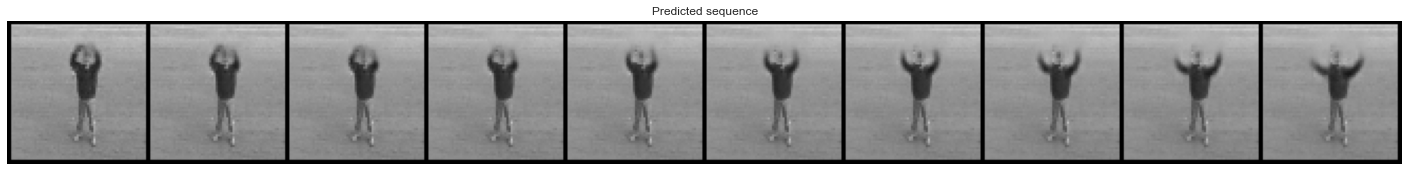

In [ ]:
utils.visualise_sample(test_loader_kth, model_mse_ssim_explr_kth, device, True)

<h3 id="best">Best Performing models</h3>

<h5 id="bestmmnist"> Best performing model for Moving-MNIST was found to be the one trained on combined perceptual loss (MSE + $\lambda$ * SSIM). More details are given in the report. Below are the results from it from a test sample.

In [ ]:
model = Model()
print("Model Loaded")

model_mse_ssim_onplateau_mmnist, _, epoch = utils.loading_model(model, "C:\\Users\\aysha\\Downloads\\model_50_ssim_lr_warmup_mnist.pth")
model_mse_ssim_onplateau_mmnist= model_mse_ssim_onplateau_mmnist.to(device)



Model Loaded


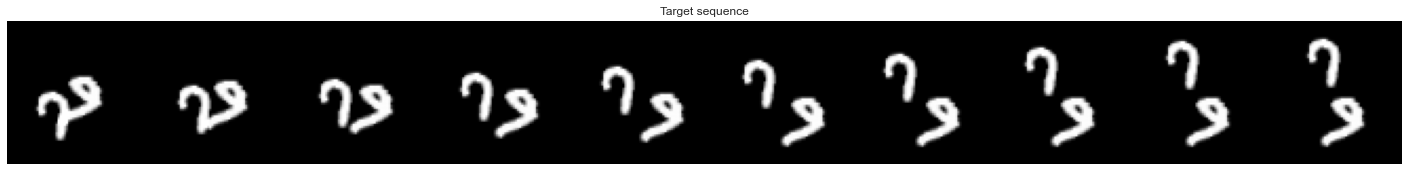

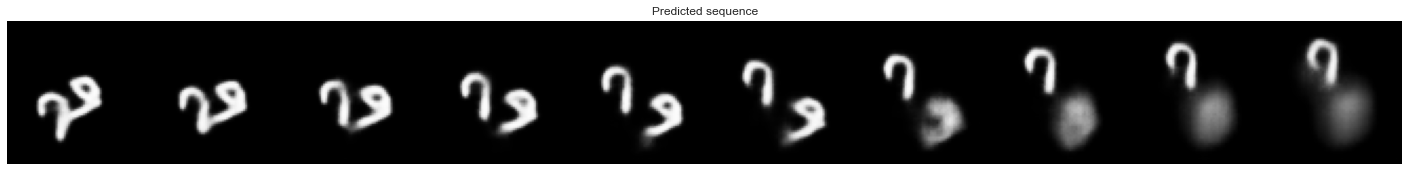

In [ ]:
utils.visualise_sample(test_loader_mmnist, model_mse_ssim_onplateau_mmnist, device, True)

<h5 id="bestkth"> Best performing model for KTH action dataset was found to be the one trained on combined perceptual loss (MSE + $\lambda$ * SSIM). More details are given in the report. Below are the results from it from a test sample.

<h3 id=references> References </h3>

- <a ref="https://github.com/vkhoi/KTH-Action-Recognition">https://github.com/vkhoi/KTH-Action-Recognition</a></li>
- <a ref="https://github.com/edenton/svg">https://github.com/edenton/svg</a></li>
- <a ref="https://github.com/CeeBeeTree/KTH-Action-Recognition">https://github.com/CeeBeeTree/KTH-Action-Recognition</a></li>
- <a ref="https://github.com/pytorch/vision/blob/7947fc8fb38b1d3a2aca03f22a2e6a3caa63f2a0/torchvision/models/resnet.py#L37">https://github.com/pytorch/vision/blob/7947fc8fb38b1d3a2aca03f22a2e6a3caa63f2a0/torchvision/models/resnet.py#L37</a>
- <a ref="https://holmdk.github.io/2020/04/02/video_prediction.html">https://holmdk.github.io/2020/04/02/video_prediction.html</a>